In [ ]:
# 구글 드라이브 마운트
from google.colab import drive


drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import os

drive_dir = "/content/drive/MyDrive/colab"
data_dir = os.path.join(drive_dir,"Term_Dataset")
data_dir

'/content/drive/MyDrive/colab/Term_Dataset'

In [ ]:
category = ['bag','bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/colab/Term_Dataset/train_data.csv')

In [ ]:
train_list = train_df.file_name.tolist()

In [ ]:
# 폴더 생성 - train

for i in category:
  os.mkdir('/content/drive/MyDrive/colab/Term_Dataset'+'/'+'train'+'/'+i)

In [ ]:
import shutil

In [ ]:
# 폴더에 옮기기 - train
for i in range(len(train_list)):
 shutil.move(os.path.join(data_dir, 'train', train_list[i]), os.path.join(data_dir, 'train', train_df.loc[i:i,['class']].values.astype(str)[0][0], train_list[i]))

val data csv 파일로 폴더 생성 후 옮기기

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/colab/Term_Dataset/val_data.csv')

In [ ]:
val_list = val_df.file_name.tolist()

In [ ]:
# 폴더 생성 - val

for i in category:
  os.mkdir('/content/drive/MyDrive/colab/Term_Dataset'+'/'+'val'+'/'+i)

In [ ]:
# 폴더에 옮기기 - val
for i in range(len(val_list)):
 shutil.move(os.path.join(data_dir, 'val', val_list[i]), os.path.join(data_dir, 'val', val_df.loc[i:i,['class']].values.astype(str)[0][0], val_list[i]))

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils

In [ ]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd
import PIL

In [ ]:
# train 데이터 개수
image_count=0
for i in category:
  list = os.listdir('/content/drive/MyDrive/colab/Term_Dataset/train'+'/'+i)
  number_files = len(list)
  image_count = image_count + number_files

print(image_count)


864


In [ ]:
# val 데이터 개수
image_count=0
for i in category:
  list = os.listdir('/content/drive/MyDrive/colab/Term_Dataset/val'+'/'+i)
  number_files = len(list)
  image_count = image_count + number_files

print(image_count)

133


In [ ]:
batch_size = 32
img_h = 256
img_w = 256
num_classes = 11

In [ ]:
train_dir = '/content/drive/MyDrive/colab/Term_Dataset/train'

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.2,
    fill_mode="constant"
)


In [ ]:
train_ds = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (img_h, img_w),
    class_mode = 'categorical',
    subset = 'training',
    batch_size = 32,
    shuffle=True,
    seed=123
)

Found 864 images belonging to 11 classes.


In [ ]:
val_dir = '/content/drive/MyDrive/colab/Term_Dataset/val'

In [ ]:
val_datagen = preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255,
)

In [ ]:
val_ds = val_datagen.flow_from_directory(
    directory = val_dir,
    target_size = (img_h, img_w),
    class_mode = 'categorical',
    subset = 'training',
    batch_size = 32,
    shuffle=True,
    seed=123
)

Found 133 images belonging to 11 classes.


In [ ]:
sample_data, sample_label = train_ds.next()

In [ ]:
sample_data.shape, sample_label.shape

((32, 256, 256, 3), (32, 11))

In [ ]:
inputs = layers.Input(shape=(img_h, img_w, 3), name='img')
x=layers.Conv2D(32, 3, activation="relu")(inputs)
x=layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

In [ ]:
x=layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x=layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

In [ ]:
x=layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x=layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

In [ ]:
x=layers.Conv2D(64, 3, activation="relu")(block_3_output)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(256, activation="relu")(x)
x=layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes)(x)

In [ ]:
model = models.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 254, 254, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 252, 252, 64  18496       ['conv2d[0][0]']                 
                                )                                                        

In [ ]:
model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

20에폭

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
27/27 [==============================] - 565s 20s/step - loss: 2.3820 - accuracy: 0.1343 - val_loss: 2.3451 - val_accuracy: 0.1429
Epoch 2/20
27/27 [==============================] - 33s 1s/step - loss: 2.3249 - accuracy: 0.1227 - val_loss: 2.3024 - val_accuracy: 0.1729
Epoch 3/20
27/27 [==============================] - 33s 1s/step - loss: 2.2707 - accuracy: 0.1493 - val_loss: 2.2188 - val_accuracy: 0.1654
Epoch 4/20
27/27 [==============================] - 32s 1s/step - loss: 2.1977 - accuracy: 0.1759 - val_loss: 2.1674 - val_accuracy: 0.2782
Epoch 5/20
27/27 [==============================] - 33s 1s/step - loss: 2.0788 - accuracy: 0.1933 - val_loss: 2.0110 - val_accuracy: 0.2707
Epoch 6/20
27/27 [==============================] - 32s 1s/step - loss: 2.0278 - accuracy: 0.2315 - val_loss: 1.9658 - val_accuracy: 0.2932
Epoch 7/20
27/27 [==============================] - 33s 1s/step - loss: 1.9473 - accuracy: 0.2535 - val_loss: 1.8695 - val_accuracy: 0.3083
Epoch 8/20
27/27 [

In [ ]:
test_scores = model.evaluate(val_ds, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

5/5 - 3s - loss: 0.9932 - accuracy: 0.6541 - 3s/epoch - 633ms/step
Test loss: 0.9931573867797852
Test accuracy: 0.6541353464126587


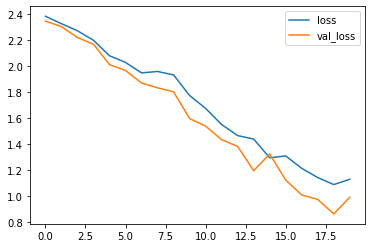

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

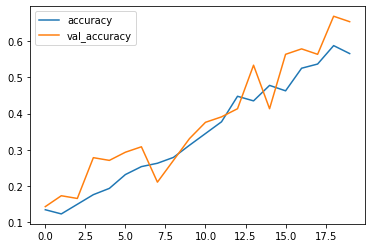

In [ ]:
history_df[["accuracy", "val_accuracy"]].plot()

40에폭

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=40
)

Epoch 1/40
27/27 [==============================] - 34s 1s/step - loss: 1.0164 - accuracy: 0.5833 - val_loss: 1.0767 - val_accuracy: 0.6165
Epoch 2/40
27/27 [==============================] - 33s 1s/step - loss: 0.9660 - accuracy: 0.6458 - val_loss: 0.8676 - val_accuracy: 0.6617
Epoch 3/40
27/27 [==============================] - 33s 1s/step - loss: 0.8903 - accuracy: 0.6424 - val_loss: 0.7414 - val_accuracy: 0.6767
Epoch 4/40
27/27 [==============================] - 33s 1s/step - loss: 0.8871 - accuracy: 0.6377 - val_loss: 1.2741 - val_accuracy: 0.6015
Epoch 5/40
27/27 [==============================] - 33s 1s/step - loss: 0.9970 - accuracy: 0.6215 - val_loss: 0.8789 - val_accuracy: 0.6917
Epoch 6/40
27/27 [==============================] - 33s 1s/step - loss: 0.7898 - accuracy: 0.6829 - val_loss: 1.1028 - val_accuracy: 0.6692
Epoch 7/40
27/27 [==============================] - 33s 1s/step - loss: 0.7828 - accuracy: 0.6910 - val_loss: 0.5863 - val_accuracy: 0.7519
Epoch 8/40
27/27 [==

In [ ]:
test_scores = model.evaluate(val_ds, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

5/5 - 3s - loss: 0.1702 - accuracy: 0.9474 - 3s/epoch - 629ms/step
Test loss: 0.17020069062709808
Test accuracy: 0.9473684430122375


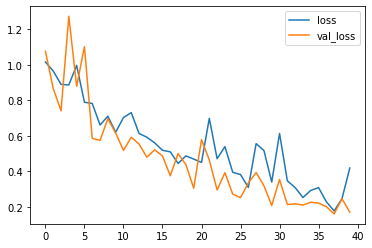

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

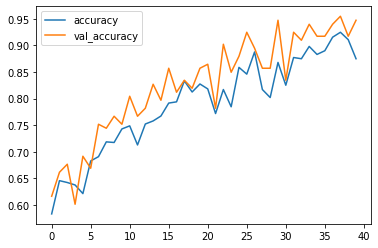

In [ ]:
history_df[["accuracy", "val_accuracy"]].plot()

60에폭

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=60
)

Epoch 1/60
27/27 [==============================] - 33s 1s/step - loss: 0.2018 - accuracy: 0.9340 - val_loss: 0.1111 - val_accuracy: 0.9549
Epoch 2/60
27/27 [==============================] - 33s 1s/step - loss: 0.1991 - accuracy: 0.9340 - val_loss: 0.2161 - val_accuracy: 0.9549
Epoch 3/60
27/27 [==============================] - 33s 1s/step - loss: 0.1545 - accuracy: 0.9456 - val_loss: 0.1096 - val_accuracy: 0.9398
Epoch 4/60
27/27 [==============================] - 32s 1s/step - loss: 0.2646 - accuracy: 0.9028 - val_loss: 0.1414 - val_accuracy: 0.9699
Epoch 5/60
27/27 [==============================] - 33s 1s/step - loss: 0.9388 - accuracy: 0.7812 - val_loss: 0.5495 - val_accuracy: 0.8120
Epoch 6/60
27/27 [==============================] - 33s 1s/step - loss: 0.5086 - accuracy: 0.8241 - val_loss: 0.2030 - val_accuracy: 0.9474
Epoch 7/60
27/27 [==============================] - 33s 1s/step - loss: 0.3467 - accuracy: 0.8669 - val_loss: 0.1399 - val_accuracy: 0.9624
Epoch 8/60
27/27 [==

In [ ]:
test_scores = model.evaluate(val_ds, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

5/5 - 3s - loss: 0.0063 - accuracy: 1.0000 - 3s/epoch - 618ms/step
Test loss: 0.006312219426035881
Test accuracy: 1.0


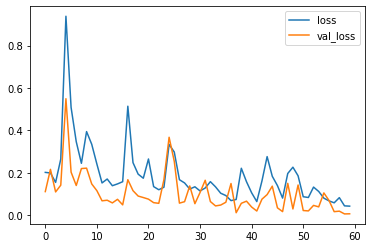

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

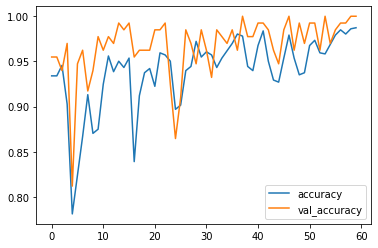

In [ ]:
history_df[["accuracy", "val_accuracy"]].plot()

80에폭

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=80
)

Epoch 1/80
27/27 [==============================] - 195s 7s/step - loss: 2.3759 - accuracy: 0.1331 - val_loss: 2.3419 - val_accuracy: 0.1429
Epoch 2/80
27/27 [==============================] - 32s 1s/step - loss: 2.3457 - accuracy: 0.1424 - val_loss: 2.2978 - val_accuracy: 0.1429
Epoch 3/80
27/27 [==============================] - 32s 1s/step - loss: 2.2780 - accuracy: 0.1505 - val_loss: 2.1679 - val_accuracy: 0.1880
Epoch 4/80
27/27 [==============================] - 32s 1s/step - loss: 2.1632 - accuracy: 0.2060 - val_loss: 2.0755 - val_accuracy: 0.2030
Epoch 5/80
27/27 [==============================] - 32s 1s/step - loss: 2.0755 - accuracy: 0.1944 - val_loss: 1.8857 - val_accuracy: 0.3609
Epoch 6/80
27/27 [==============================] - 32s 1s/step - loss: 1.8783 - accuracy: 0.2755 - val_loss: 1.7288 - val_accuracy: 0.3684
Epoch 7/80
27/27 [==============================] - 32s 1s/step - loss: 1.7378 - accuracy: 0.3333 - val_loss: 1.5431 - val_accuracy: 0.3459
Epoch 8/80
27/27 [=

In [ ]:
test_scores = model.evaluate(val_ds, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

5/5 - 3s - loss: 0.0703 - accuracy: 0.9774 - 3s/epoch - 626ms/step
Test loss: 0.07033353298902512
Test accuracy: 0.9774436354637146


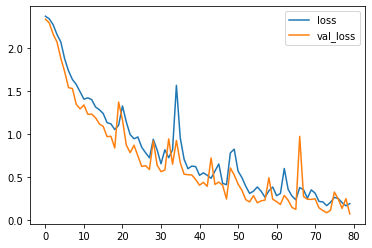

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

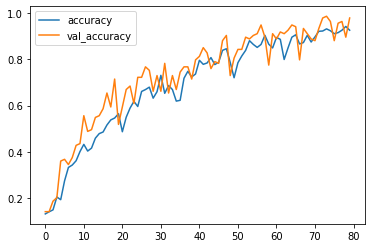

In [ ]:
history_df[["accuracy", "val_accuracy"]].plot()